# SAE 2.02 - Exploration algorithmique d'un problème

## Partie 1 : PageRank - version itérative, premier exemple

On considère le graphe du web simplifié suivant (avec $N=14$ pasges).

![graphe web v1](assets/grapheP1.png)

1. Justifier pourquoi l'algorithme de la puissance itérée (vu en détails dans le TD de R2.09 dédié à la SAE) permet de calculer le score de chacune des pages.

L'algorithme de puissance itérée permet de calculer le score de chacune des pages car on part d'un vecteur initial(score de chaque page) et on applique la formule $r=Qr$ en boucle jusqu'à ce que le score ne change pratiquement plus.
Comme notre matrice est stochastique, la plus grande valeur propre est 1.

2. Implémenter cet algorithme pour calculer le score de chacune des pages du graphe précédent. </br>
On vérifiera (numériquement) que le vecteur du score obtenue est bien approximativement solution de $r=Qr$.

In [ ]:
import numpy as np

def matrice_transposee(A):
    """
    Fonction matrice_transposee qui prend en entrée 
    une matrice A et qui renvoie sa transposée.

    Argument:
    A   matrice, doit être un tableau

    Retour:
    A   matrice, est un tableau
    """
    A = np.array(A)
    if A.ndim == 1:
        d = int(np.sqrt(len(A)))
        # Redimensionner la matrice en une matrice carrée
        # [a,b,c,d] => [[a,b],[c,d]]
        A = A.reshape((d, d))
    # Retourne directement la transposée
    return A.T

def matrice_stochastique(C):
    """
    Fonction matrice_stochastique qui prend en entrée 
    une matrice C et qui renvoie sa stochastique.

    Argument:
    C   matrice, doit être un tableau

    Retour:
    Q   matrice, est un tableau 
    """
    # Transforme la matrice en matrice numpy en float
    C = np.array(C, dtype=float)

    # Somme par colonne
    som_col = C.sum(axis=0)
    # Remplace 0 par 1 pour éviter division par zéro
    som_col[som_col == 0] = 1

    # Normalise chaque colonne
    # La somme de la colonne fait 1
    Q = C / som_col
    return Q

def norme(X):
    """
    Fonction norme qui prend en entrée 
    un vecteur X et qui calcule sa norme.

    Argument:
    X   vecteur, doit être un tableau

    Retour:
    _    norme, est un entier
    """
    sum = 0
    # On ajoute le carré à la variable
    for x in np.array(X):
        sum += x**2
    # On retourne la racine à la variable
    return np.sqrt(sum)

def puissance_iteree(C, p=1e-6):
    """
    Fonction puissance_iteree qui prend en entrée 
    une matrice A, une précision p et qui retourne 
    un tableau de vecteur propre.
    
    Arguments:
    A       matrice, doit être un tableau
    p       précision, doit être un entier

    Retours:
    r       scores, est un tableau
    Q       matrice, est un tableau
    ite     itération, est un entier
    """

    # Transforme en matrice np
    C = np.array(C)

    # Transposé de la matrice
    C = matrice_transposee(C)

    # stochastique de la matrice
    Q = matrice_stochastique(C)

    # Nombre de page (aussi la dimention)
    N = Q.shape[0]
    
    # Vecteur initial de test
    # r = [1_0, ... 1_{N-1}]
    r = np.ones(N) / N

    # Vecteur initial
    # r = np.array([])
    # for _ in range(N):
    #     r = np.append(r, np.random.randint(0, 10))

    # itération
    ite = 0

    while True:
        ancien_r = r.copy()
        # Multiplication de la matrice par le vecteur
        r = np.dot(Q, r)

        ite += 1

        # On compare deux matrices selon la précision p
        if np.allclose(r, ancien_r, atol=p):
            return ancien_r, Q, ite

# Matrice web N=14 i pointe vers j
webP1 = [
    0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
]

p = 1e-6

r, Q, _ = puissance_iteree(webP1, I <- matrice d'identité de taille d
p)

# Affichage des scores des pages
for x in range(len(r)):
    print(f"Page {x+1:<2} : {r[x]:.4f}")

# Vérification que r = Qr
verification = np.dot(Q, r)
print("On vérifie que r = Qr : ")
if np.allclose(verification, r, atol=p):
    print("r = Qr")
else:
    print("r != Qr")

Page 1  : 0.1376
Page 2  : 0.0275
Page 3  : 0.0367
Page 4  : 0.0459
Page 5  : 0.0596
Page 6  : 0.1651
Page 7  : 0.0550
Page 8  : 0.1101
Page 9  : 0.0550
Page 10 : 0.1376
Page 11 : 0.0275
Page 12 : 0.0367
Page 13 : 0.0459
Page 14 : 0.0596
On vérifie que r = Qr : 
r = Qr


3. Analyser la pertinence du résultat obtenu.

In [29]:
page_rank = list(enumerate(r, start=1))
# Trie par score décroissant
page_rank.sort(key=lambda tup: tup[1], reverse=True)

listeLiensEntrants = [5,1,2,2,3,3,1,3,1,5,1,2,2,3]
listeLiensSortants = [5,3,2,2,1,3,2,1,2,5,3,2,2,1]

print("PageRank :\t\tEntrants\tSortants")
for page, rank in page_rank:
    print(f"Page {page}\t: {rank:.4f}\t" + str(listeLiensEntrants[page-1]) + "\t\t" + str(listeLiensSortants[page-1]))

PageRank :		Entrants	Sortants
Page 1	: 0.1394	5		5
Page 10	: 0.1394	5		5
Page 6	: 0.1352	3		3
Page 8	: 0.0907	3		1
Page 5	: 0.0668	3		1
Page 14	: 0.0668	3		1
Page 13	: 0.0532	2		2
Page 4	: 0.0532	2		2
Page 7	: 0.0490	1		2
Page 9	: 0.0490	1		2
Page 12	: 0.0442	2		2
Page 3	: 0.0442	2		2
Page 2	: 0.0344	1		3
Page 11	: 0.0344	1		3


Les pages ayant un score identique sont issues du fait qu'elles sont symmétriques par rapport aux pages 6 et 8. Pour chaque côté de la symmétrie, chaque page reçoit et envoi la même quantité de liens des mêmes émetteurs.

**Page 6 : (0.1651) (1er meilleur score)**
- Reçoit 3 liens entrant de qualité (page 1, 10 & 8)

**Page 1 & 10 : (0.1376) (2ème meilleur score)**
- Reçoivent 5 liens entrant
- Donnent autant qu'elles reçovent des liens, et chaque lien donné est donc affaibli

**Page 8 : (0.1101) (3ème meilleur score)**
- Reçoit le lien de la page 6 (très fort) ainsi que de 2 pages (page 7 & 9)
- Donne un lien à la page 6, donc cette page augmente fortement

**Page 5 & 14 : (0.0596)**
- Reçoivent trois liens qui, ajoutés entre eux, donnent un bon score
- Donnent un lien aux pages 1 et 10 respectivement, donc elles augmentent bien leur rank

**Page 7 & 9 : (0.0550)**
- Reçoivent le lien de la page 6 (très fort)
- Donnent des liens aux pages 1 et 10 respectivement, ainsi qu'à la 8, donc elles augmentent généralament

**Page 4 & 13 : (0.0459)**
- Reçoivent deux liens faibles
- Donnent un lien à 5 et 14 respectivement, apportant légèrement à sa valeur

**Page 3 & 12 : (0.0367)**
- Reçoivent deux liens faibles aussi
- Donnent un lien à 4 et 13 respectivement, et indirectement donc à celle de 5 et 14 respectivement

**Page 2 & 11 : (0.0275)**
- Reçoivent un lien faible
- Donnent un lien à 3 et 12 respectivement, et indirectement donc à celle de 5 et 14 respectivement, ainsi qu'un deuxième lie, directe à ces pages


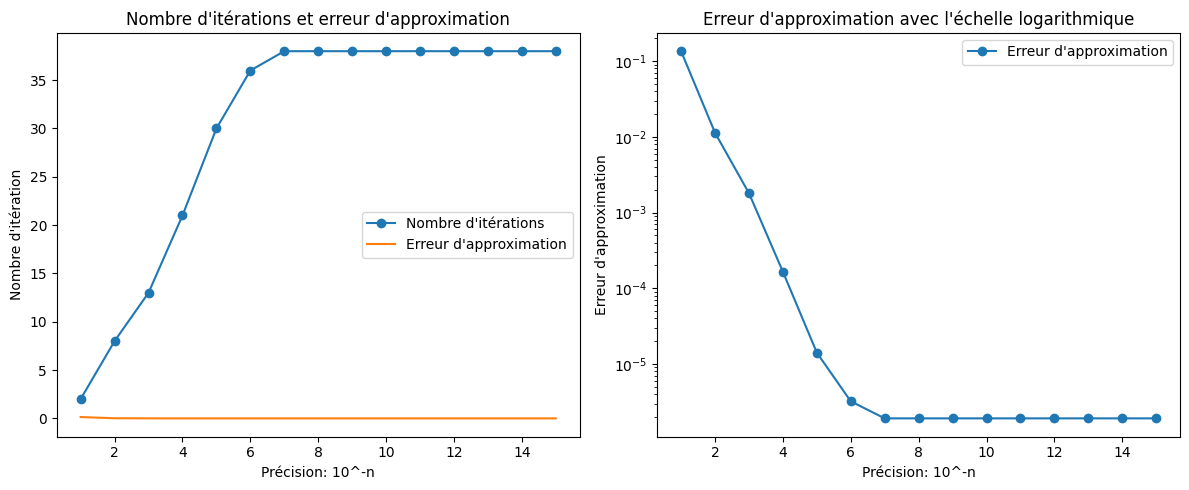

In [3]:
import matplotlib.pyplot as plt

n_list = np.arange(1, 16)
ite_list = []
err_list = []

for n in n_list:
    # Précision 10^{-n}
    p = 10.0**(-n)
    r, Q, iterations = puissance_iteree(webP1, p)
    ite_list.append(iterations)
    err = norme(r - np.dot(Q, r))
    err_list.append(err)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(n_list, ite_list, label="Nombre d'itérations", marker='o')
plt.plot(n_list, err_list, label="Erreur d'approximation")
plt.xlabel("Précision: 10^-n")
plt.ylabel("Nombre d'itération")
plt.title("Nombre d'itérations et erreur d'approximation")
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogy(n_list, err_list, label="Erreur d'approximation", marker='o')
plt.xlabel("Précision: 10^-n")
plt.ylabel("Erreur d'approximation")
plt.title("Erreur d'approximation avec l'échelle logarithmique")
plt.legend()

plt.tight_layout()
plt.show()

## Partie 2 : PageRank - version itérative, deuxième exemple

1. Appliquer l’algorithme de la Partie 1 au graphe suivant et commenter le résultat obtenu.

![graphe web v2](assets/grapheP2.png)

In [4]:
webP2 = [
    0, 0, 0, 0, 0,
    1, 0, 0, 0, 0,
    1, 0, 0, 1, 0,
    1, 1, 0, 0, 0,
    1, 1, 0, 0, 0
]

# Calcul des scores des pages de la matrice web
r, P, _ = puissance_iteree(webP2)
for page in range(len(r)):
    print(f"Page {page+1:<3}: {r[page]:.4f}")

print()
# Vérification que r = P*r
verification = np.dot(P, r)
print("On vérifie que r = Pr")
if np.allclose(verification, r, atol=0.85):
    print("r = Pr")
else:
    print("r != Pr")
print()

Page 1  : 0.0000
Page 2  : 0.0000
Page 3  : 0.0000
Page 4  : 0.0000
Page 5  : 0.0000

On vérifie que r = Pr
r = Pr



Si on applique au graphe l'algorithme de la partie 1, celui-ci plantera parce que dans ce graphe on a un puit, ce qui produit une colonne nulle dans la matrice stochastique. Le problème c'est que l'on veux multiplier chaque colonne par un vecteur, et cette colonne nulle fera en sorte que le rank pour ce sommet soit zéro, ce qui ne fait pas de sens car graphiquement on voit qu'il est pointé par quelqu'un, et il doit donc avoir un rank non nul.

Si on a $r_2=Qr_1$, là où on aurait une colonne nulle, la multiplier par notre vecteur revient à renvoyer un 0.

Pour éviter cela, on appliquera désormais l’algorithme de la puissance itérée à la matrice de transition $P = (p_{i,j})_{1≤i,j≤N}$ définie par </br>

$$
p_{i,j}=
\begin{cases}
\alpha q_{i,j} + \frac{1 - \alpha}{N} & \text{si } N_j \neq 0, \\
\frac{1}{N} & \text{sinon.}
\end{cases}
$$

où $\alpha \in [1,0]$ est un paramètre à chosir appelé "facteur d'amortissement".

2. En utilisant cette matrice de transition (avec $\alpha = 0.85$), calculer les scores de chacune des pages du graphe précédent. Commenter. On vérifiera (numériquement) que le vecteur de score obtenu est bien approximativement solution de $r = Pr$.

In [45]:
# Appliquement du facteur d'armortissement
def matrice_transition_P(A, alpha=0.85):
    """
    Fonction matrice_transition_P qui prend en entrée une matrice et un facteur d'amortissement.

    Arguments:
    A       matrice, doit être un tableau
    alpha   facteur d'amorticement, doit etre un float [0,1]

    Retour:
    A       matrice normalisé, est un tableau
    """
    A = np.array(A)
    for i in range(len(A)):
        colSom = np.sum(A[:, i]) # Stockage de la somme d'une colonne
        if colSom == 0:
            A[:, i] = [1/len(A)] # Si somme = 0, alors la colonne entière devienne 1/N
        else:
            A[:, i] = alpha * A[:, i] + (1-alpha)/len(A) # Sinon, chaque cellule devienne alpha * cellule + (1-alpha)/N
    return A

def puissance_iteree_facteur(C, p=1e-6, alpha=0.85):
    """
    Fonction puissance_iteree_facteur qui prend en entrée 
    une matrice A, une précision p, un facteur d'amortissement 
    et qui retourne le score de chaque page le vecteur propre.
    
    Arguments:
    A       matrice, doit être un tableau
    p       précision, doit être un entier
    alpha   facteur d'amorticement, doit etre un float [0,1]
    """

    C = np.array(C)

    # Transposé de la matrice
    C = matrice_transposee(C)

    # Calcule de la matrice Q
    Q = matrice_stochastique(C)

    # Traitement par colonne
    Q = matrice_transition_P(Q, alpha)

    # Nombre de page
    N = Q.shape[0]

    # Vecteur initial de test
    # r = [1_0, ... 1_{N-1}]
    r = np.ones(N) / N

    # Vecteur initial
    # r = np.array([])
    # for _ in range(N):
    #     r = np.append(r, np.random.randint(0, 10))

    # itération
    ite = 0

    while True:
        ancien_r = r.copy()
        r = np.dot(Q, r)

        ite += 1

        # On compare deux matrices selon la précision p
        if np.allclose(r, ancien_r, atol=p):
            return ancien_r, Q, ite

precision = 1e-6

r, P, _ = puissance_iteree_facteur(webP2, precision)
for page in range(len(r)):
    print(f"Page {page+1:<3}: {r[page]:.4f}")

print()
# Vérification que r = P*r
verification = np.dot(P, r)
print("On vérifie que r = Pr")
if np.allclose(verification, r, atol=precision):
    print("r = Pr")
else:
    print("r != Pr")
print()

Page 1  : 0.4339
Page 2  : 0.2107
Page 3  : 0.1038
Page 4  : 0.1479
Page 5  : 0.1038

On vérifie que r = Pr
r = Pr





En appliquant la nouvelle matrice de transition, on attribue donc le facteur d'amortissement, ce qui nous permet d'attribuer aux cellules nulles une valeur non nulle pour que le sommet correspondant aie un score même s'il s'agit d'un puit.

Dans la suite c’est cet algorithme que l’on désignera par PageRank version itérative. Il est appelé itératif car il calcule successivement des approximations du vecteur de score $r$ cherché.

## Partie 3 : PageRank - version itérative, analyse

Pour le moment on pose $\alpha = 0.85$ et on considère le graphe de la Partie 1.

1. Analyser l’influence du critère d'arrêt dans l’algorithme de la puissance itérée.

In [74]:
import time

#3.2A - Ajout de Hub seulement
webWithHub = [
    0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,   # Page 1 [Hub] -> {2, 3, 4, 5, 6}
    1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,   #Page 10 [Hub] -> {6, 9, 11, 12, 13, 14}
    0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
]

#3.2B - Ajout d'Authoritié seulement
webWithAuthority = [
    0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,   #Page 6 [Authority] -> {8}
    1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   #Page 14 [Authority] -> {}
]

#3.2C - Ajout des Hubs et des Authorités
webWithHubAndAuthority = [
    0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,   # Page 1 [Authority] -> {2, 6}
    1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,   #Page 6 [Hub] -> {1, 7, 8, 9, 10}
    1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,   #Page 8 [Authority] -> {}
    0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
    1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
    1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
    0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
    1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,   #Page 14 [Hub] -> {10, 11, 13}
]


# Partie 3.3 - Augementation du score des pages X
# Matrice de boost pour les pages X en ajoutant des liens entrants vers une page ciblée
webPageXScoreBoost = [
    0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,   #Page 1
    1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   #Page 2 -> Page 1
    1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   #Page 3 -> Page 1
    1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   #Page 4 -> Page 1
    1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   #Page 5 -> Page 1
    1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,   #Page 6 -> Page 1, 10
    1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,   #Page 7 -> Page 1
    1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,   #Page 8 -> Page 1
    1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,   #Page 9 -> Page 10, 1
    1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   #Page 10 > Page 1
    1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,   #Page 11 -> Page 10, 1
    1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,   #Page 12 -> Page 10, 1
    1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,   #Page 13 -> Page 10, 1
    1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,   #Page 14 -> Page 10, 1
]

def puissance_iteree_facteur_temps(A, p=1e-6, alpha=0.85):
    """
    Fonction puissance_iteree qui prend en entrée 
    une matrice A, une précision p et qui retourne 
    le vecteur propre.
    
    A       matrice, doit être un tableau
    p       précision, doit être un entier   
    """

    A = np.array(A)

    # Transpose et stochastique la matrice
    Q = matrice_stochastique(matrice_transposee(A))

    # Traitement par colonne
    Q = matrice_transition_P(Q, alpha)

    d = Q.shape[0]
    r = np.ones(d) / d # Normalisation
    iterations = 0
    start_time = time.time()

    while True:
        ancien_r = r.copy()
        r = np.dot(Q, r)
        # On incrémente le nombre d'itérations à chaque boucle
        iterations += 1
        elapsed_time = time.time() - start_time
        # On compare deux matrices selon la précision p
        if np.allclose(r, ancien_r, atol=p):
            print(f"Convergence atteinte en {iterations} itérations avec p = {p} et alpha = {alpha}. Temps écoulé : {elapsed_time:.4f} secondes.")
            return ancien_r
        
# On applique la fonction puissance_iteree_facteur_temps sur les différents graphes
r = puissance_iteree_facteur_temps(webP1, 1e-6, 0.85)
rHA = puissance_iteree_facteur_temps(webWithHubAndAuthority, 1e-6, 0.85)
rB = puissance_iteree_facteur_temps(webPageXScoreBoost, 1e-6, 0.85)

# On crée une liste de tuples (index_page, score)
page_rank = list(enumerate(r, start=1))
page_rank_HuAu = list(enumerate(rHA, start=1))
page_rank_BoostedPage = list(enumerate(rB, start=1))


print("PageRank :")
for page, rank in page_rank:
    print(f"Page {page}\t: {rank:.4f}")

# On extrait le premier rangs pour le graphique
rankWebNormal = []
for i in page_rank:
    rankWebNormal.append(i[1])


print(f"\n" + "=" * 60) #Séparateur
print("\nPageRank avec un Hub :")


print(f"\n" + "=" * 60)
print("\nPageRank avec un Hub et une Authority (Version1) :")

for page, rank in page_rank_HuAu:
    print(f"Page {page}\t: {rank:.4f}")

# On extrait le second rangs pour le graphique
rankWebHuAu = []
for i in page_rank_HuAu:
    rankWebHuAu.append(i[1])


print(f"\n" + "=" * 60)
print("\nPageRank avec 2 pages boosté :")

# On affiche le PageRank avec les pages boostées
for page, rank in page_rank_BoostedPage:
    print(f"Page {page}\t: {rank:.4f}")

# On effectue les tests avec différentes précisions
print(f"\n" + "=" * 60)
print("\nNombre d'itérations par présicion :")

# Liste des précisions pour les tests
precisions = [1e-1, 1e-3, 1e-6, 1e-9]

for p in precisions:
    print(f"\nCalcul avec précision {p}:")
    rP = puissance_iteree_facteur_temps(webP1, p, 0.85)
    page_rank_Precs = list(enumerate(rP, start=1))
    for page, rank in page_rank_Precs:
        print(f"Page {page}\t: {rank:.4f}")

Convergence atteinte en 23 itérations avec p = 1e-06 et alpha = 0.85. Temps écoulé : 0.0018 secondes.
Convergence atteinte en 18 itérations avec p = 1e-06 et alpha = 0.85. Temps écoulé : 0.0012 secondes.
Convergence atteinte en 41 itérations avec p = 1e-06 et alpha = 0.85. Temps écoulé : 0.0025 secondes.
PageRank :
Page 1	: 0.1394
Page 2	: 0.0344
Page 3	: 0.0442
Page 4	: 0.0532
Page 5	: 0.0668
Page 6	: 0.1352
Page 7	: 0.0490
Page 8	: 0.0907
Page 9	: 0.0490
Page 10	: 0.1394
Page 11	: 0.0344
Page 12	: 0.0442
Page 13	: 0.0532
Page 14	: 0.0668


PageRank avec un Hub :


PageRank avec un Hub et une Authority (Version1) :
Page 1	: 0.1870
Page 2	: 0.0571
Page 3	: 0.0693
Page 4	: 0.0676
Page 5	: 0.0888
Page 6	: 0.1550
Page 7	: 0.0254
Page 8	: 0.1153
Page 9	: 0.0254
Page 10	: 0.0637
Page 11	: 0.0252
Page 12	: 0.0240
Page 13	: 0.0449
Page 14	: 0.0514


PageRank avec 2 pages boosté :
Page 1	: 0.4268
Page 2	: 0.0833
Page 3	: 0.0833
Page 4	: 0.0833
Page 5	: 0.0833
Page 6	: 0.0924
Page 7	: 0.0107
Pa

Pour analyser le critère d'arrêt, on peut observer le nombre d'itérations nécessaires pour atteindre la convergence par rapport à la précision donnée. On doit d'abord ajouter un compteur d'itérations dans la fonction `puissance_iteree_facteur_temps` et afficher ce compteur à la fin de chaque exécution et analyser l'impact de la précision sur le résultat, on peut exécuter la fonction `puissance_iteree_facteur_temps` avec différentes valeurs de précision et observer comment les scores des pages changent. On observe que plus la précision est élevée, plus le nombre d'itérations augmente, ce qui peut ralentir le calcul. Cependant, les scores finaux convergent vers des valeurs stables, indiquant que la précision est atteinte.

2. Ajouter quelques hubs (pages qui ont beaucoup de liens sortant) et autorités (pages
qui ont beaucoup de liens entrant). Commenter l’impact sur les scores.

In [75]:
rH = puissance_iteree_facteur_temps(webWithHub, 1e-6, 0.85)
rA = puissance_iteree_facteur_temps(webWithAuthority, 1e-6, 0.85)
rHA = puissance_iteree_facteur_temps(webWithHubAndAuthority, 1e-6, 0.85)

page_rank_Hub = list(enumerate(rH, start=1))
page_rank_Auth = list(enumerate(rA, start=1))
page_rank_HuAu = list(enumerate(rHA, start=1))

print(f"\n" + "=" * 60) #Séparateur
print("\nPageRank avec un Hub :")

for page, rank in page_rank_Hub:
    print(f"Page {page}\t: {rank:.4f}")   

rankHub = []
for i in page_rank_Hub:
    rankHub.append(i[1])

print(f"\n" + "=" * 60)
print("\nPageRank avec une Authority :")

for page, rank in page_rank_Auth:
    print(f"Page {page}\t: {rank:.4f}")

rankAuth = []
for i in page_rank_Auth:
    rankAuth.append(i[1])

print(f"\n" + "=" * 60)
print("\nPageRank avec un Hub et une Authority (Version1) :")

for page, rank in page_rank_HuAu:
    print(f"Page {page}\t: {rank:.4f}")

# On extrait le second rangs pour le graphique
rankWebHuAu = []
for i in page_rank_HuAu:
    rankWebHuAu.append(i[1])

Convergence atteinte en 22 itérations avec p = 1e-06 et alpha = 0.85. Temps écoulé : 0.0010 secondes.
Convergence atteinte en 64 itérations avec p = 1e-06 et alpha = 0.85. Temps écoulé : 0.0028 secondes.
Convergence atteinte en 18 itérations avec p = 1e-06 et alpha = 0.85. Temps écoulé : 0.0013 secondes.


PageRank avec un Hub :
Page 1	: 0.1331
Page 2	: 0.0296
Page 3	: 0.0380
Page 4	: 0.0457
Page 5	: 0.0574
Page 6	: 0.1423
Page 7	: 0.0699
Page 8	: 0.1104
Page 9	: 0.0699
Page 10	: 0.1331
Page 11	: 0.0296
Page 12	: 0.0380
Page 13	: 0.0457
Page 14	: 0.0574


PageRank avec une Authority :
Page 1	: 0.1300
Page 2	: 0.0354
Page 3	: 0.0455
Page 4	: 0.0548
Page 5	: 0.0687
Page 6	: 0.2349
Page 7	: 0.0133
Page 8	: 0.2244
Page 9	: 0.0133
Page 10	: 0.0519
Page 11	: 0.0221
Page 12	: 0.0284
Page 13	: 0.0342
Page 14	: 0.0430


PageRank avec un Hub et une Authority (Version1) :
Page 1	: 0.1870
Page 2	: 0.0571
Page 3	: 0.0693
Page 4	: 0.0676
Page 5	: 0.0888
Page 6	: 0.1550
Page 7	: 0.0254
Page 8	: 0.115

L'impact des scores des pages en ajoutant des Hubs et des Autoritès est significatif. Les Hubs et les Autorités influencent la manière dont les scores sont distribués entre les pages. Les Hubs, qui sont des pages avec de nombreux liens sortants, peuvent augmenter le score des pages qu'ils pointent, tandis que les Autorités, qui sont des pages avec de nombreux liens entrants, peuvent également recevoir un score plus élevé. En comparant les scores avec et sans Hubs et Autorités, on peut voir que certaines pages gagnent en importance dans le réseau, ce qui reflète leur rôle dans la structure du web.

3. Essayez d'accroître le score de certaines pages. Expliquez votre méthode et validez-la expérimentalement.

In [76]:
rB = puissance_iteree_facteur_temps(webPageXScoreBoost, 1e-6, 0.85)

page_rank_BoostedPage = list(enumerate(rB, start=1))


print("\nPageRank avec 2 pages boosté :")

# On affiche le PageRank avec les pages boostées
for page, rank in page_rank_BoostedPage:
    print(f"Page {page}\t: {rank:.4f}")

Convergence atteinte en 41 itérations avec p = 1e-06 et alpha = 0.85. Temps écoulé : 0.0028 secondes.

PageRank avec 2 pages boosté :
Page 1	: 0.4268
Page 2	: 0.0833
Page 3	: 0.0833
Page 4	: 0.0833
Page 5	: 0.0833
Page 6	: 0.0924
Page 7	: 0.0107
Page 8	: 0.0107
Page 9	: 0.0107
Page 10	: 0.0727
Page 11	: 0.0107
Page 12	: 0.0107
Page 13	: 0.0107
Page 14	: 0.0107


Afin d'augmenter le score des pages X, on peut ajouter des liens entrants vers ces pages dans la matrice d'adjacence. Cela peut être réalisé en modifiant la matrice d'adjacence pour inclure des liens supplémentaires vers les pages ciblées. Par exemple, si l'on souhaite augmenter le score de la page 1, on peut ajouter des liens entrants depuis les pages 2 à 5 vers la page 1. Cela augmentera le score de la page 1 dans le calcul du PageRank, car elle recevra plus de "votes" de la part des autres pages.

4. Faites varier le facteur d’amortissement $\alpha$ pour analyser son influence. On rappelle que $\alpha \in [0, 1]$.

In [77]:
# Liste des alphas pour les tests
alphas = [0.1, 0.9, 0.85, 0.99]

for a in alphas:
    print(f"\nCalcul avec alpha {a}:")
    rAlpha = puissance_iteree_facteur_temps(webP1, 1e-6, a)
    page_rank_Alphas = list(enumerate(rAlpha, start=1))
    for page, rank in page_rank_Alphas:
        print(f"Page {page}\t: {rank:.4f}")


Calcul avec alpha 0.1:
Convergence atteinte en 5 itérations avec p = 1e-06 et alpha = 0.1. Temps écoulé : 0.0003 secondes.
Page 1	: 0.0839
Page 2	: 0.0660
Page 3	: 0.0682
Page 4	: 0.0694
Page 5	: 0.0716
Page 6	: 0.0750
Page 7	: 0.0668
Page 8	: 0.0735
Page 9	: 0.0668
Page 10	: 0.0839
Page 11	: 0.0660
Page 12	: 0.0682
Page 13	: 0.0694
Page 14	: 0.0716

Calcul avec alpha 0.9:
Convergence atteinte en 26 itérations avec p = 1e-06 et alpha = 0.9. Temps écoulé : 0.0013 secondes.
Page 1	: 0.1400
Page 2	: 0.0323
Page 3	: 0.0420
Page 4	: 0.0513
Page 5	: 0.0651
Page 6	: 0.1432
Page 7	: 0.0501
Page 8	: 0.0952
Page 9	: 0.0501
Page 10	: 0.1400
Page 11	: 0.0323
Page 12	: 0.0420
Page 13	: 0.0513
Page 14	: 0.0651

Calcul avec alpha 0.85:
Convergence atteinte en 23 itérations avec p = 1e-06 et alpha = 0.85. Temps écoulé : 0.0010 secondes.
Page 1	: 0.1394
Page 2	: 0.0344
Page 3	: 0.0442
Page 4	: 0.0532
Page 5	: 0.0668
Page 6	: 0.1352
Page 7	: 0.0490
Page 8	: 0.0907
Page 9	: 0.0490
Page 10	: 0.1394
Page 

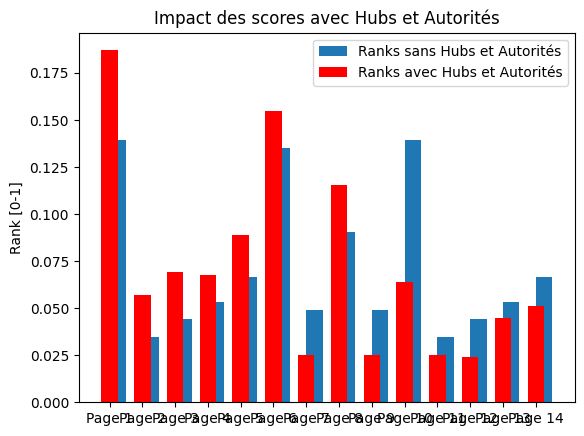

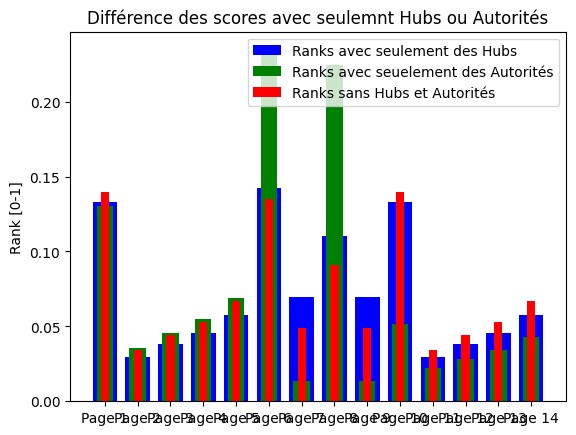

In [78]:
def creerListePages(n):
    listePages = []
    for i in range(n):
        listePages.append("Page " + str(i+1))
    return listePages

qtePages = 14

listePages = creerListePages(qtePages)

matriceSansHubEtAut = rankWebNormal
matriceAvecHubEtAut = rankWebHuAu
matriceAvecHub = rankHub
matriceAvecAut = rankAuth

plt.bar(listePages, matriceSansHubEtAut, align='edge',width= 0.5, label="Ranks sans Hubs et Autorités")
plt.bar(listePages, matriceAvecHubEtAut, color='red', width=0.5, label="Ranks avec Hubs et Autorités")

plt.title("Impact des scores avec Hubs et Autorités")
plt.ylabel("Rank [0-1]")
plt.legend()
plt.show()


plt.bar(listePages, matriceAvecHub, align='center', color= 'blue', width=0.75, label="Ranks avec seulement des Hubs")
plt.bar(listePages, matriceAvecAut, color='green', width=0.5, label="Ranks avec seuelement des Autorités")
plt.bar(listePages, matriceSansHubEtAut, align='center', color='red',width= 0.25, label="Ranks sans Hubs et Autorités")

plt.title("Différence des scores avec seulemnt Hubs ou Autorités")
plt.ylabel("Rank [0-1]")
plt.legend()
plt.show()

On observe qu'apres la varition de l'alpha, les scores des pages changent en fonction de la valeur de alpha. Un alpha plus élevé (proche de 1) donne plus de poids aux liens existants, tandis qu'un alpha plus bas (proche de 0) favorise l'exploration aléatoire des pages. Cela peut influencer la manière dont les scores sont distribués entre les pages, en favorisant certaines pages qui ont des liens sortants importants ou en redistribuant le score de manière plus uniforme.

## Partie 4 : PageRank - version itérative, analyse

Dans cette partie, appliquez l’algorithme de PageRank version itérative aux différentes matrices ci-dessous. On portera une attention particulière à l’analyse des résultats ainsi qu’à leur interprétation.

1. En utilisant le logiciel d’exploration de site web présent sur la page Ametice (et vu en TP de R2.07), construire trois matrices de votre choix et appliquez l’algorithme de PageRank à ces matrices. L’ordre de ces matrices sera compris entre 10 et 30. Ces matrices, le résultat du logiciel d’exploration ainsi que le site web choisi apparaîtront clairement dans le dossier.

In [48]:
# nextjs 10*10 : nextjs.org
matrice1 = [
    1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,1,1,1,1,1,
    1,1,0,0,0,0,0,0,0,0,
    1,1,0,0,0,0,0,0,0,0,
    1,1,0,1,0,0,0,1,1,1,
    1,1,0,0,0,0,0,0,0,0,
]

# astro 20*20 : astro.build
matrice2 = [
    1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,
    1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,
    1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,
    1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
]

# svelte 30*30 : svelte.dev
matrice3 = [
    1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,1,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
]

matrices = [
    [
        "Next js: ",
        [
            "/",
            "?uwu=true/",
            "/showcase",
            "/docs",
            "/blog",
            "/learn",
            "/learn?utm_source=next-site&amp;utm_medium=homepage-cta&amp;utm_campaign=home",
            "/docs/app/building-your-application/optimizing/images",
            "/docs/app/building-your-application/data-fetching",
            "/docs/app/building-your-application/data-fetching/forms-and-mutations",
        ],
        matrice1
    ],
    [
        "Astro :",
        [
            "/",
            "/blog",
            "/themes",
            "/integrations",
            "/showcase",
            "/chat",
            "/agencies",
            "/case-studies",
            "/blog/astro-590",
            "/_astro/ec.gzb7n.css",
            "/integrations?search=&categories%5B%5D=adapters",
            "/themes/details/starlight",
            "/themes/details/astroship",
            "/themes/details/astrolus",
            "/themes/details/prima-persona",
            "/themes/details/tailcast",
            "/themes/details/astro-shopify",
            "/themes/details/quick-store",
            "/themes/details/skncre-a-hygraph-cosmetics-brand-e-commerce",
            "/themes?search=&categories%5B%5D=ecommerce",
        ],
        matrice2
    ],
    [
        "Svelte: ",
        [
            "/",
            "/docs",
            "/docs/svelte",
            "/docs/kit",
            "/docs/cli",
            "/tutorial",
            "/playground",
            "/blog",
            "/chat",
            "/docs/svelte/v5-migration-guide",
            "/docs/llms",
            "/docs/svelte/overview",
            "/docs/svelte/getting-started",
            "/docs/svelte/svelte-files",
            "/docs/svelte/svelte-js-files",
            "/docs/svelte/what-are-runes",
            "/docs/svelte/$state",
            "/docs/svelte/$derived",
            "/docs/svelte/$effect",
            "/docs/svelte/$props",
            "/docs/svelte/$bindable",
            "/docs/svelte/$inspect",
            "/docs/svelte/$host",
            "/docs/svelte/basic-markup",
            "/docs/svelte/if",
            "/docs/svelte/each",
            "/docs/svelte/key",
            "/docs/svelte/await",
            "/docs/svelte/snippet",
            "/docs/svelte/@render",
        ] ,
        matrice3
    ]
]

r, Q, _ = puissance_iteree_facteur(matrice1)

def afficher_web_top10(r):
    """
    Affiche les 10 meilleurs nœuds avec leurs scores PageRank
    """
    print("\nRang\tScore\t\tURL")
    print("-" * 80)
    
    # Créer une liste de tuples (score, url)
    scores_avec_index = [(r[i], urls[i]) for i in range(len(r))]

    # Trier par score décroissant
    scores_tries = sorted(scores_avec_index, key=lambda x: x[0], reverse=True)

    # Afficher les 10 premiers
    for rang in range(min(10, len(scores_tries))):
        score, url = scores_tries[rang]
        print(f"{rang+1}\t{score:.8f}\t{url}")

# Affichage du score de chaque page de chaque matrice
for nom, urls, matrice in matrices:
    print(f"\n{'='*50}")
    print(f"Données pour {nom}")
    print(f"{'='*50}")

    # Calcul des scores PageRank
    r, Q, _ = puissance_iteree_facteur(matrice)

    print(f"Matrice: {Q.shape}")
    print(f"Nombre de page: {len(Q)}")
    print(f"Score moyen: {np.mean(r):.6f}")
    print(f"Score max: {np.max(r):.6f}")
    print(f"Score min: {np.min(r):.6f}")

    afficher_web_top10(r)


Données pour Next js: 
Matrice: (10, 10)
Nombre de page: 10
Score moyen: 0.100000
Score max: 0.186698
Score min: 0.072355

Rang	Score		URL
--------------------------------------------------------------------------------
1	0.18669756	/
2	0.18669756	?uwu=true/
3	0.08429653	/docs/app/building-your-application/data-fetching
4	0.08429653	/docs/app/building-your-application/data-fetching/forms-and-mutations
5	0.08429653	/docs
6	0.08429653	/docs/app/building-your-application/optimizing/images
7	0.07235469	/showcase
8	0.07235469	/blog
9	0.07235469	/learn
10	0.07235469	/learn?utm_source=next-site&amp;utm_medium=homepage-cta&amp;utm_campaign=home

Données pour Astro :
Matrice: (20, 20)
Nombre de page: 20
Score moyen: 0.050000
Score max: 0.351827
Score min: 0.007500

Rang	Score		URL
--------------------------------------------------------------------------------
1	0.35182723	/
2	0.05153936	/blog
3	0.05018468	/themes/details/skncre-a-hygraph-cosmetics-brand-e-commerce
4	0.03840492	/blog/astro-590

2. Sur la page Ametice vous trouverez les matrices du réseau routier (issues de OpenStreet Map) de différentes villes. Chaque groupe "éudiera la matrice “413 Avenue Gaston Berger” ainsi que la ville qui lui a été affectée (voir sur la page Ametice). </br>
Pour notre cas, ça sera Nice.

In [54]:
## Nice
# Matrice de la ville
M_nice = np.load("Data/Nice/Nice_France_Matrice.npy")
# Liste des identifiants des noeuds
N_nice = np.load("Data/Nice/Nice_France_Id_Noeud.npy")

## Aix
# Matrice de ville
M_aix = np.load("Data/Aix/413_avenue_Gaston_Berger_Aix_en_Provence_France_Matrice.npy")
# Liste des identifiants des noeuds
N_aix = np.load("Data/Aix/413_avenue_Gaston_Berger_Aix_en_Provence_France_Id_Noeud.npy")

# Fonction pour afficher le noeud sur la map
def url(noeud):
    return "https://www.openstreetmap.org/node/" + str(noeud)


def afficher_ville_top10(r, noeuds):
    """
    Fonction afficher_ville_top10 qui prend en entrée le score de chaque page r et les identifiants des noeuds

    Arguments:
    r       score, doit être un tableau
    noeuds  identifiant, doit être un tableau
    """
    
    print("\nRang\tScore\t\tID Noeud\t\tURL")
    print("-" * 80)
    
    # Créer une liste de tuples (score, noeuds)
    scores_avec_index = [(r[i], noeuds[i]) for i in range(len(r))]
    
    # Trier par score décroissant
    scores_tries = sorted(scores_avec_index, key=lambda x: x[0], reverse=True)
    
    # Afficher les 10 premiers
    for rang in range(min(10, len(scores_tries))):
        score, noeud_id = scores_tries[rang]
        print(f"{rang+1}\t{score:.6f}\t{noeud_id}\t\t{url(noeud_id)}")

villes = [
    [
        "Nice: ",
        M_nice.T,
        N_nice,
    ],
    [
        "Aix: ",
        M_aix,
        N_aix
    ]
]

# Calcul PageRank pour chaque ville
for nom_ville, matrice, noeuds in villes:
    print(f"\n{'='*50}")
    print(f"Données pour {nom_ville}")
    print(f"{'='*50}")
    
    # Calcul des scores PageRank
    r, P, _ = puissance_iteree_facteur(matrice)
        
    print(f"Matrice: {matrice.shape}")
    print(f"Nombre de noeud: {len(noeuds)}")
    print(f"Score moyen: {np.mean(r):.6f}")
    print(f"Score max: {np.max(r):.6f}")
    print(f"Score min: {np.min(r):.6f}")
    
    # Afficher le top 10
    afficher_ville_top10(r, noeuds)


Données pour Nice: 
Matrice: (1563, 1563)
Nombre de noeud: 1563
Score moyen: 0.000640
Score max: 0.002836
Score min: 0.000098

Rang	Score		ID Noeud		URL
--------------------------------------------------------------------------------
1	0.002836	24558432		https://www.openstreetmap.org/node/24558432
2	0.001674	1210922002		https://www.openstreetmap.org/node/1210922002
3	0.001674	24665589		https://www.openstreetmap.org/node/24665589
4	0.001631	24962257		https://www.openstreetmap.org/node/24962257
5	0.001608	24558437		https://www.openstreetmap.org/node/24558437
6	0.001559	24358154		https://www.openstreetmap.org/node/24358154
7	0.001524	24328315		https://www.openstreetmap.org/node/24328315
8	0.001496	24637927		https://www.openstreetmap.org/node/24637927
9	0.001494	24358301		https://www.openstreetmap.org/node/24358301
10	0.001489	303406904		https://www.openstreetmap.org/node/303406904

Données pour Aix: 
Matrice: (1259, 1259)
Nombre de noeud: 1259
Score moyen: 0.000794
Score max: 0.002108
Sc

## Partie 5 : PageRank - calcul direct des scores et comparaisons s'algorithmes

1. On rappelle que le vecteur de score est solution du système $r=Pr$. </br>
En déduire un algorithme de calcul direct (c’est-à-dire de calcul exact et sans approximations successives) du score $r$. </br>
Ecrire le pseudo-code correspondant à cet algorithme.

Entrée: 
- A, matrice web
- alpha, facteur d'amortissemnt

Q <- transposé de A
Q <- stochastique de Q
Q <- matrice de transition P de Q

d <- dimension de la matrice
I <- matrice d'identité de taille d

system <- P - I

b <- vecteur de taille d rempli de 1
system <- remplace la derniere ligne par b

résoudre le system (system, b)

2. Implémenter cet algorithme.

On n'a pas réussi à implémenter la fonction

In [86]:
def puissance_iteree_exacte(A, alpha=0.85):
    Q = matrice_stochastique(matrice_transposee(A))
    P = matrice_transition_P(Q, alpha)

    # Dimension de la matrice
    d = P.shape[0]

    # Matrice identitée
    # [[1,0,0]
    #  [0,1,0]
    #  [0,0,1]]
    I = np.eye(d)

    system = I - P
    system[-1, :] = 1


    # vecteur 1 de taille d
    b = np.ones(d)

    r = np.linalg.solve(system, b)
    return r

print(puissance_iteree_exacte(webP1))

[ 10.76273649   2.84037949   3.64515368   4.3895698    5.51072084
   3.47812523   1.9961831    3.69293874   1.9961831  -14.71324813
  -1.4905379   -1.91285697  -2.30350211 -16.89184536]


3. Comparer les résultats obtenus par les deux algorithmes.

4. Comparer les performances des deux algorithmes. </br>
Si le temps d’exécution peut être un indicateur pertinent, ce n’est pas le seul.

## Partie 6 : PageRank - matrice du langage

Cette partie bonus ne sera traitée que lorsque tout le reste aura été fait. </br>
Reprendre l’analyse de la partie 4 avec la matrice du langage donnée sur la page Ametice. 
La difficulté est de gérer la taille des données puisque cette matrice est de taille $180062 × 180062$.

## Participation

**CORDOVANA Enzo:**
- Implémentation de la partie 1 (70%)
- Implémentation de la partie 4 (100%)
- Soutient pour la partie 5 (20%)

**GUDENSCHWAGER Oliver:**
- Correction & mise en page de la partie 1 (30%)
- Implémentation de la partie 2 (100%)
- Aide à l'implémentation de la partie 3 (30%)

**SISE Aboubakar:**
- Implémentation de la partie 3 (70%)
- Début de la partie 5 (80%)